In [2]:
# 1. kagglehub 설치
!pip install -q kagglehub


In [ ]:

# 2. kaggle.json 업로드
from google.colab import files
files.upload()  # 여기서 kaggle.json 업로드


In [4]:

# 3. 인증 설정
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import glob
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [5]:

# kaggle.json 읽어서 환경변수 설정
with open("kaggle.json") as f:
    kaggle_token = json.load(f)
    os.environ["KAGGLE_USERNAME"] = kaggle_token["username"]
    os.environ["KAGGLE_KEY"] = kaggle_token["key"]


In [6]:

# 4. kagglehub로 데이터셋 다운로드
import kagglehub


In [7]:

# 'Real-life industrial dataset of casting product' 다운로드
path = kagglehub.dataset_download("ravirajsinh45/real-life-industrial-dataset-of-casting-product")

print("Path to dataset files:", path)


100%|██████████| 100M/100M [00:05<00:00, 17.9MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/versions/2


In [8]:
# !ls /kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512


In [9]:
!ls /root/.cache/kagglehub/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/versions/2/casting_512x512/casting_512x512/def_front

cast_def_0_0.jpeg     cast_def_0_3978.jpeg  cast_def_0_7216.jpeg
cast_def_0_100.jpeg   cast_def_0_3989.jpeg  cast_def_0_7217.jpeg
cast_def_0_1015.jpeg  cast_def_0_3992.jpeg  cast_def_0_7230.jpeg
cast_def_0_102.jpeg   cast_def_0_3993.jpeg  cast_def_0_7232.jpeg
cast_def_0_1046.jpeg  cast_def_0_4017.jpeg  cast_def_0_7248.jpeg
cast_def_0_1053.jpeg  cast_def_0_4023.jpeg  cast_def_0_724.jpeg
cast_def_0_1055.jpeg  cast_def_0_4026.jpeg  cast_def_0_7264.jpeg
cast_def_0_1077.jpeg  cast_def_0_4030.jpeg  cast_def_0_7275.jpeg
cast_def_0_1087.jpeg  cast_def_0_4032.jpeg  cast_def_0_7286.jpeg
cast_def_0_1091.jpeg  cast_def_0_4034.jpeg  cast_def_0_7295.jpeg
cast_def_0_1104.jpeg  cast_def_0_4090.jpeg  cast_def_0_7315.jpeg
cast_def_0_1108.jpeg  cast_def_0_4093.jpeg  cast_def_0_7324.jpeg
cast_def_0_1112.jpeg  cast_def_0_4106.jpeg  cast_def_0_7326.jpeg
cast_def_0_1115.jpeg  cast_def_0_4108.jpeg  cast_def_0_7336.jpeg
cast_def_0_1123.jpeg  cast_def_0_4109.jpeg  cast_def_0_7338.jpeg
cast_def_0_1137.jpeg  cast

## okay dataset check

In [10]:
ok_path = "/root/.cache/kagglehub/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/versions/2/casting_512x512/casting_512x512/ok_front"
# ok_path = "/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front"
ok_img = glob.glob(os.path.join(ok_path,"*.jpeg"))
print(ok_img)

['/root/.cache/kagglehub/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/versions/2/casting_512x512/casting_512x512/ok_front/cast_ok_0_5576.jpeg', '/root/.cache/kagglehub/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/versions/2/casting_512x512/casting_512x512/ok_front/cast_ok_0_6079.jpeg', '/root/.cache/kagglehub/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/versions/2/casting_512x512/casting_512x512/ok_front/cast_ok_0_3214.jpeg', '/root/.cache/kagglehub/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/versions/2/casting_512x512/casting_512x512/ok_front/cast_ok_0_3186.jpeg', '/root/.cache/kagglehub/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/versions/2/casting_512x512/casting_512x512/ok_front/cast_ok_0_1592.jpeg', '/root/.cache/kagglehub/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/versions/2/casting_512x512/casting_512x512/ok_front/cast_ok

In [11]:
len(os.listdir(ok_path)) # 이미지 개수 확인|


519

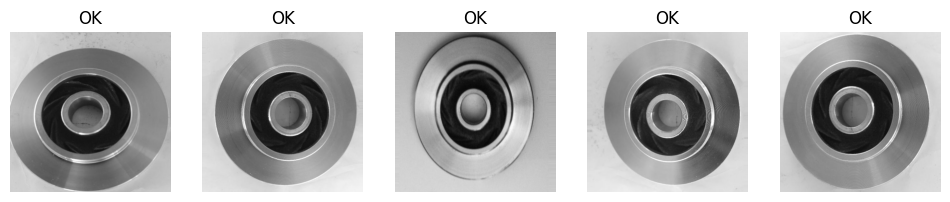

In [12]:
# 첫 5개 이미지 보기
plt.figure(figsize=(12, 4))
for i, img_path in enumerate(ok_img[:5]):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img, cmap="gray")
    plt.title("OK")
    plt.axis("off")
plt.show()

## defect dataset check

In [13]:
!ls /root/.cache/kagglehub/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/versions/2/casting_512x512/casting_512x512/def_front
# !ls /kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/def_front

cast_def_0_0.jpeg     cast_def_0_3978.jpeg  cast_def_0_7216.jpeg
cast_def_0_100.jpeg   cast_def_0_3989.jpeg  cast_def_0_7217.jpeg
cast_def_0_1015.jpeg  cast_def_0_3992.jpeg  cast_def_0_7230.jpeg
cast_def_0_102.jpeg   cast_def_0_3993.jpeg  cast_def_0_7232.jpeg
cast_def_0_1046.jpeg  cast_def_0_4017.jpeg  cast_def_0_7248.jpeg
cast_def_0_1053.jpeg  cast_def_0_4023.jpeg  cast_def_0_724.jpeg
cast_def_0_1055.jpeg  cast_def_0_4026.jpeg  cast_def_0_7264.jpeg
cast_def_0_1077.jpeg  cast_def_0_4030.jpeg  cast_def_0_7275.jpeg
cast_def_0_1087.jpeg  cast_def_0_4032.jpeg  cast_def_0_7286.jpeg
cast_def_0_1091.jpeg  cast_def_0_4034.jpeg  cast_def_0_7295.jpeg
cast_def_0_1104.jpeg  cast_def_0_4090.jpeg  cast_def_0_7315.jpeg
cast_def_0_1108.jpeg  cast_def_0_4093.jpeg  cast_def_0_7324.jpeg
cast_def_0_1112.jpeg  cast_def_0_4106.jpeg  cast_def_0_7326.jpeg
cast_def_0_1115.jpeg  cast_def_0_4108.jpeg  cast_def_0_7336.jpeg
cast_def_0_1123.jpeg  cast_def_0_4109.jpeg  cast_def_0_7338.jpeg
cast_def_0_1137.jpeg  cast

In [14]:
deft_path = "/root/.cache/kagglehub/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/versions/2/casting_512x512/casting_512x512/def_front"
# deft_path = "/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/def_front"
deft_img = glob.glob(os.path.join(deft_path,"*.jpeg"))

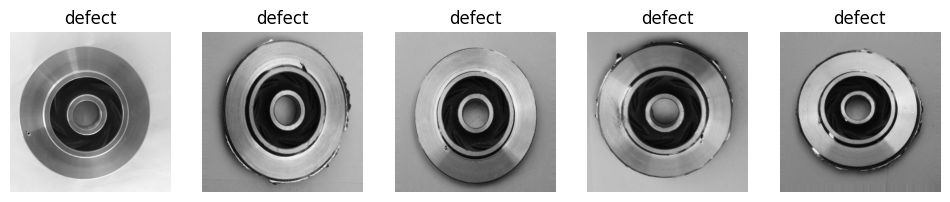

In [15]:
plt.figure(figsize=(12, 4))
for i, img_path in enumerate(deft_img[:5]):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img, cmap="gray")
    plt.title("defect")
    plt.axis("off")
plt.show()

In [16]:
deft_num = len(os.listdir(deft_path)) # 이미지 개수 확인
deft_num

781

## 양품 불량 데이터 하나로 합치기

In [17]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend();

In [18]:
import shutil

In [19]:
# 기본 경로
base_path = "/root/.cache/kagglehub/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/versions/2/casting_512x512/casting_512x512/"
# base_path = "/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/"
merge_path = "/content/merged_dataset"

# 새 폴더 만들기
os.makedirs(merge_path, exist_ok=True)
os.makedirs(os.path.join(merge_path, "train"), exist_ok=True)
os.makedirs(os.path.join(merge_path, "test"), exist_ok=True)
os.makedirs(os.path.join(merge_path,"train/good"), exist_ok=True)
os.makedirs(os.path.join(merge_path,"train/defect"), exist_ok=True)
os.makedirs(os.path.join(merge_path,"test/good"), exist_ok=True)
os.makedirs(os.path.join(merge_path,"test/defect"), exist_ok=True)

In [20]:

# 라벨과 파일명을 저장할 리스트
data = []

# 1. 양품 이미지 복사 및 라벨링
ok_dir = os.path.join(base_path, "ok_front")
for fname in os.listdir(ok_dir):
    if fname.endswith(".jpeg"):
        src = os.path.join(ok_dir, fname)
        print(src)
        dst = os.path.join(merge_path, f"train/good/{fname}")
        shutil.copy(src, dst)
        data.append({"filename":f"{fname}", "label":1 }) # 정상: 1

# 2. 불량 이미지 복사 및 라벨링
def_dir = os.path.join(base_path, "def_front")
for fname in os.listdir(def_dir):
    if fname.endswith(".jpeg"):
        src = os.path.join(def_dir, fname)
        dst = os.path.join(merge_path, f"train/defect/{fname}")
        shutil.copy(src, dst)
        data.append({"filename":f"{fname}", "label":0}) # 불량 : 0


/root/.cache/kagglehub/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/versions/2/casting_512x512/casting_512x512/ok_front/cast_ok_0_5576.jpeg
/root/.cache/kagglehub/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/versions/2/casting_512x512/casting_512x512/ok_front/cast_ok_0_6079.jpeg
/root/.cache/kagglehub/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/versions/2/casting_512x512/casting_512x512/ok_front/cast_ok_0_3214.jpeg
/root/.cache/kagglehub/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/versions/2/casting_512x512/casting_512x512/ok_front/cast_ok_0_3186.jpeg
/root/.cache/kagglehub/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/versions/2/casting_512x512/casting_512x512/ok_front/cast_ok_0_1592.jpeg
/root/.cache/kagglehub/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/versions/2/casting_512x512/casting_512x512/ok_front/cast_ok_0_7206.jpeg
/roo

In [21]:
print(len(os.listdir(os.path.join(merge_path, "train/good"))))
print(len(os.listdir(os.path.join(merge_path, "train/defect"))))


519
781


In [22]:
import random

# 전체 데이터 중 양품, 불량 확인 후 나누기
print(len(data))

good_img = data[:519]
defect_img = data[519:]

print(good_img[-5:])
print(defect_img[:5])

1300
[{'filename': 'cast_ok_0_9395.jpeg', 'label': 1}, {'filename': 'cast_ok_0_9990.jpeg', 'label': 1}, {'filename': 'cast_ok_0_3449.jpeg', 'label': 1}, {'filename': 'cast_ok_0_1091.jpeg', 'label': 1}, {'filename': 'cast_ok_0_2394.jpeg', 'label': 1}]
[{'filename': 'cast_def_0_7076.jpeg', 'label': 0}, {'filename': 'cast_def_0_9328.jpeg', 'label': 0}, {'filename': 'cast_def_0_5759.jpeg', 'label': 0}, {'filename': 'cast_def_0_1046.jpeg', 'label': 0}, {'filename': 'cast_def_0_2426.jpeg', 'label': 0}]


In [23]:
# 섞고 나누기
random.shuffle(good_img)
random.shuffle(defect_img)

good_split_idx = int(0.8 * len(good_img))
train_good_files = good_img[:good_split_idx]
test_good_files = good_img[good_split_idx:]

defect_split_idx = int(0.8 * len(defect_img))
train_defect_files = defect_img[:defect_split_idx]
test_defect_files = defect_img[defect_split_idx:]


# 파일 복사 함수
def copy_files(file_list, src_dir, dst_dir):
    for file in file_list:
        shutil.move(os.path.join(src_dir, file["filename"]), os.path.join(dst_dir, file["filename"]))


# 실제 복사
good_src = os.path.join(merge_path, "train/good")
defect_src = os.path.join(merge_path, "train/defect")
good_dst = os.path.join(merge_path, "test/good")
defect_dst = os.path.join(merge_path, "test/defect")

copy_files(test_good_files, good_src, good_dst)
copy_files(test_defect_files, defect_src, defect_dst)


In [24]:
!ls /content/merged_dataset/test/good

cast_ok_0_1018.jpeg  cast_ok_0_4223.jpeg  cast_ok_0_7523.jpeg
cast_ok_0_1192.jpeg  cast_ok_0_4437.jpeg  cast_ok_0_7561.jpeg
cast_ok_0_1290.jpeg  cast_ok_0_4503.jpeg  cast_ok_0_7604.jpeg
cast_ok_0_1392.jpeg  cast_ok_0_4773.jpeg  cast_ok_0_7642.jpeg
cast_ok_0_1589.jpeg  cast_ok_0_4961.jpeg  cast_ok_0_7664.jpeg
cast_ok_0_1592.jpeg  cast_ok_0_4974.jpeg  cast_ok_0_766.jpeg
cast_ok_0_1695.jpeg  cast_ok_0_5009.jpeg  cast_ok_0_7693.jpeg
cast_ok_0_1715.jpeg  cast_ok_0_5137.jpeg  cast_ok_0_7720.jpeg
cast_ok_0_1863.jpeg  cast_ok_0_5150.jpeg  cast_ok_0_7741.jpeg
cast_ok_0_1963.jpeg  cast_ok_0_5173.jpeg  cast_ok_0_7815.jpeg
cast_ok_0_211.jpeg   cast_ok_0_5191.jpeg  cast_ok_0_7836.jpeg
cast_ok_0_2162.jpeg  cast_ok_0_5310.jpeg  cast_ok_0_7841.jpeg
cast_ok_0_2208.jpeg  cast_ok_0_5370.jpeg  cast_ok_0_8002.jpeg
cast_ok_0_2268.jpeg  cast_ok_0_5472.jpeg  cast_ok_0_8034.jpeg
cast_ok_0_2295.jpeg  cast_ok_0_5625.jpeg  cast_ok_0_8153.jpeg
cast_ok_0_2394.jpeg  cast_ok_0_5687.jpeg  cast_ok_0_833.jpeg
cast_ok_0_

In [25]:
!ls /content/merged_dataset/test/defect

cast_def_0_100.jpeg   cast_def_0_430.jpeg   cast_def_0_7183.jpeg
cast_def_0_1087.jpeg  cast_def_0_4336.jpeg  cast_def_0_7286.jpeg
cast_def_0_1115.jpeg  cast_def_0_4355.jpeg  cast_def_0_7431.jpeg
cast_def_0_1123.jpeg  cast_def_0_4394.jpeg  cast_def_0_7474.jpeg
cast_def_0_114.jpeg   cast_def_0_4484.jpeg  cast_def_0_7483.jpeg
cast_def_0_1157.jpeg  cast_def_0_4577.jpeg  cast_def_0_7520.jpeg
cast_def_0_127.jpeg   cast_def_0_4583.jpeg  cast_def_0_7549.jpeg
cast_def_0_1283.jpeg  cast_def_0_4604.jpeg  cast_def_0_7553.jpeg
cast_def_0_1286.jpeg  cast_def_0_4653.jpeg  cast_def_0_7556.jpeg
cast_def_0_1694.jpeg  cast_def_0_4671.jpeg  cast_def_0_7698.jpeg
cast_def_0_1800.jpeg  cast_def_0_4790.jpeg  cast_def_0_7782.jpeg
cast_def_0_1828.jpeg  cast_def_0_4801.jpeg  cast_def_0_7792.jpeg
cast_def_0_1831.jpeg  cast_def_0_4865.jpeg  cast_def_0_7837.jpeg
cast_def_0_1860.jpeg  cast_def_0_4904.jpeg  cast_def_0_7923.jpeg
cast_def_0_1949.jpeg  cast_def_0_490.jpeg   cast_def_0_7933.jpeg
cast_def_0_1958.jpeg  cas

In [26]:
len(os.listdir("/content/merged_dataset/test/good"))

104

In [27]:
len(os.listdir("/content/merged_dataset/test/defect"))

157

In [28]:
# 폴더 속 상위 5개 이미지 반환
def plt_img(dir):
    plt.figure(figsize=(12, 4))
    dir_path = glob.glob(os.path.join(dir,"*.jpeg"))
    for i, img_path in enumerate(dir_path[:5]):
        img = mpimg.imread(img_path)
        plt.subplot(1, 5, i+1)
        plt.imshow(img, cmap="gray")
        plt.title(img_path.split("/")[-1].split("_")[1])
        plt.axis("off")
    plt.show()

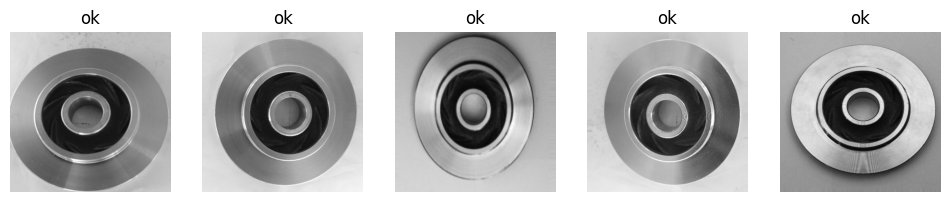

In [29]:
plt_img(os.path.join(merge_path,"train/good"))

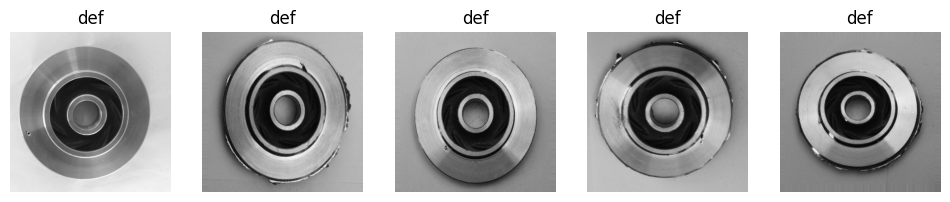

In [30]:
plt_img(os.path.join(merge_path,"train/defect"))


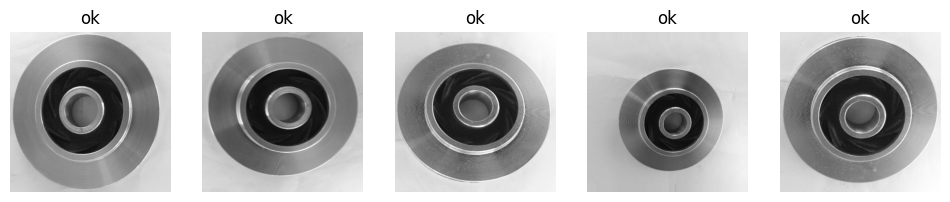

In [31]:
plt_img(os.path.join(merge_path,"test/good"))


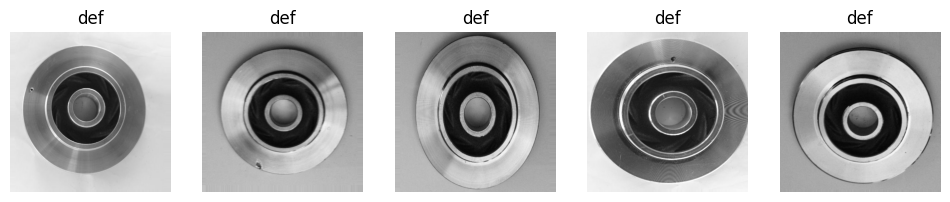

In [32]:
plt_img(os.path.join(merge_path,"test/defect"))

In [33]:
len(os.listdir("/content/merged_dataset/train/good")), len(os.listdir("/content/merged_dataset/train/defect"))

(415, 624)

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
# seed 설정
tf.random.set_seed(42)

# 데이터 전처리
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split = 0.2)

# 디렉토리 설정
train_dir = "/content/merged_dataset/train"

#  train,validation 용 데이터 로드
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               subset="training",
                                               seed=42)

val_data = train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             subset="validation",
                                             seed=42)

# 모델 생성
model_0 =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# comile the model
model_0.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_0 = model_0.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Found 832 images belonging to 2 classes.
Found 207 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.6381 - loss: 0.6638 - val_accuracy: 0.6667 - val_loss: 0.6191
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.7042 - loss: 0.5708 - val_accuracy: 0.6812 - val_loss: 0.5911
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.7199 - loss: 0.5535 - val_accuracy: 0.6377 - val_loss: 0.6938
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7756 - loss: 0.4684 - val_accuracy: 0.7198 - val_loss: 0.5320
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.8300 - loss: 0.4096 - val_accuracy: 0.7295 - val_loss: 0.4979
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.8691 - loss: 0.3157 - val_accuracy: 0.7198 - val_loss: 0.5453
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.8622 - loss: 0.3038 - val_accuracy: 0.7729 - val_loss: 0.4750
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9079 - loss: 0.2499 - val_accuracy: 0.7488 

In [36]:
val_data.filepaths[-5:]

['/content/merged_dataset/train/good/cast_ok_0_2622.jpeg',
 '/content/merged_dataset/train/good/cast_ok_0_2643.jpeg',
 '/content/merged_dataset/train/good/cast_ok_0_2695.jpeg',
 '/content/merged_dataset/train/good/cast_ok_0_2697.jpeg',
 '/content/merged_dataset/train/good/cast_ok_0_2720.jpeg']

In [37]:
# train accyracy가 너무 높고 val_accuray는 너무 낮아 과적합된 것을 알 수 있음.
# 어떤 이미지의 데이터들이 제대로 분류되지 않았는지 파악하겠음.

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# val_data.reset() # 순서를 맞추기 위해 reset
y_pred = model_0.predict(val_data,steps=len(val_data))
y_pred = (y_pred > 0.5).astype(int)
y_true = val_data.classes

print(classification_report(y_true, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step
              precision    recall  f1-score   support

           0       0.65      0.43      0.51       124
           1       0.43      0.65      0.52        83

    accuracy                           0.52       207
   macro avg       0.54      0.54      0.52       207
weighted avg       0.56      0.52      0.52       207



In [38]:
## 해당 공정은 선박 제조 공정 중 강재 전처리 및상재절단을 구부리는 과정에서 철판의 양품 불량을 판별하려고 한다.
## F1 score를 기준으로 판별 하되, F1 score가 비슷한 경우(오차 0.005)
## 불량을 양품으로 예측하는 1종 오류를 최소화하기 위해 Precision을 더 높은 우선순위로 놓고 판별하도록 하겠다.
## -> 해당 공정이 잘 못 되었을 때, 안전이 위헙하기 때문에 위 수치를 가장 중요한 기준으로 보았습니다.


In [39]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [40]:
y_pred.T[0]

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0])

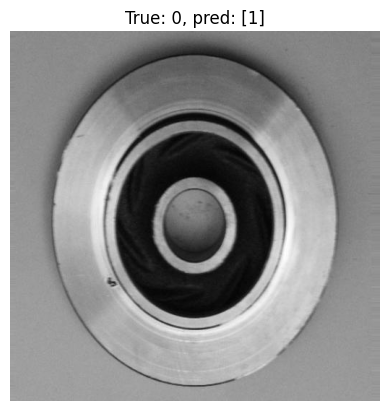

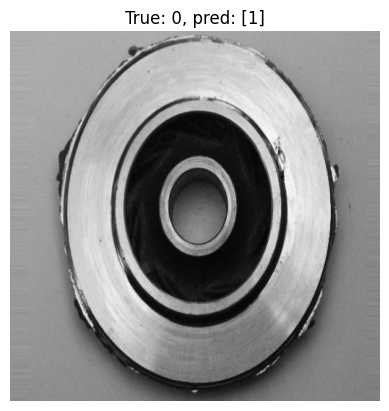

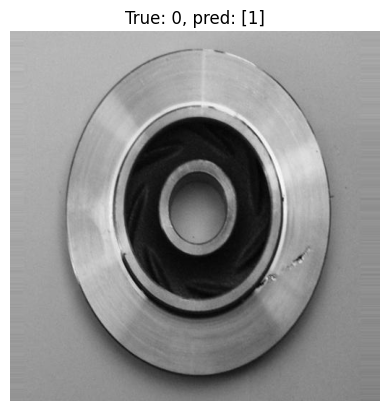

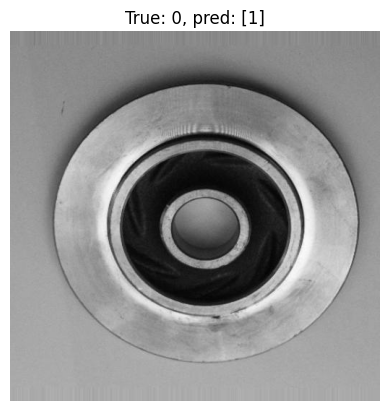

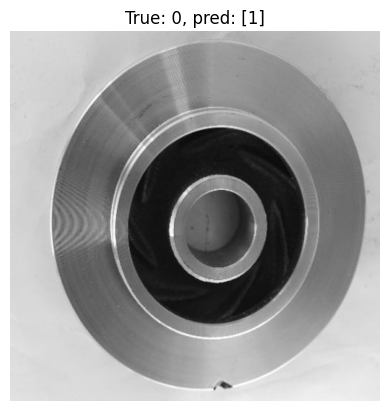

In [41]:
# 잘못 분류된 이미지 시각화
wrong_idxs = np.where(y_pred.T[0] != y_true)[0]
# wrong_idxs
for i in wrong_idxs[:5]: # 처음 5개만 출력
    img_path = val_data.filepaths[i]
    img = mpimg.imread(img_path)

    plt.imshow(img)
    plt.title(f"True: {y_true[i]}, pred: {y_pred[i]}")
    plt.axis('off')
    plt.show()

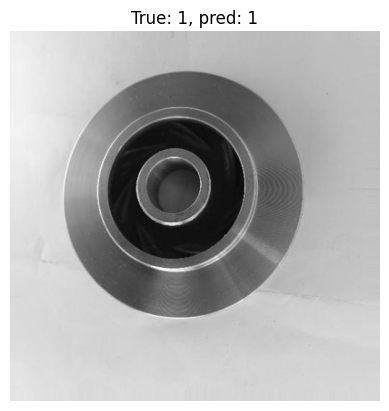

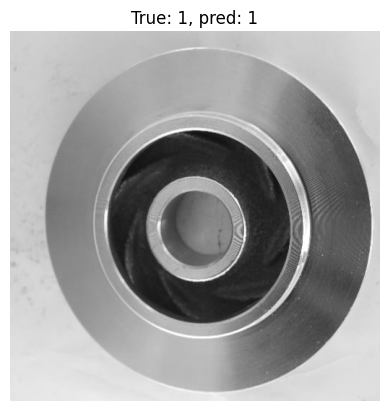

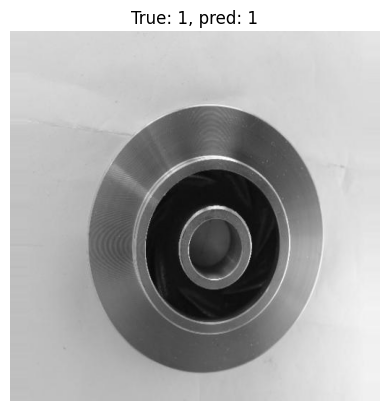

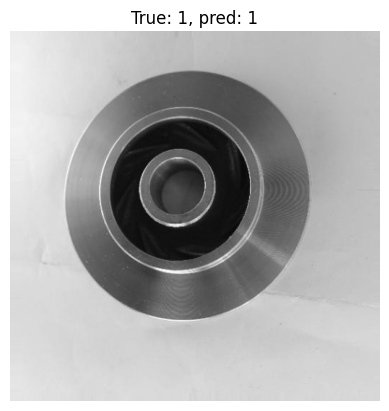

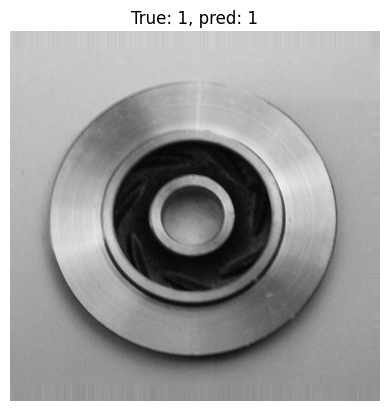

In [42]:
#잘 분류된 이미지 시각화
correct_idxs = np.where(y_pred.T[0] == y_true)[0]
# correct_idxs

for i in correct_idxs[-5:]: # 처음 5개만 출력
   img_path = val_data.filepaths[i]
   img = mpimg.imread(img_path)

   plt.imshow(img)
   plt.title(f"True: {y_true[i]}, pred: {y_pred.T[0][i]}")
   plt.axis('off')
   plt.show()

In [43]:
# 빛반사를 제대로 인식하지 못 하는 것으로 보여짐
# 대체로 원형이 제대로 유지되고 있고 거기에 홈이 나있는 형태로 제대로 인식하지 못 하는 것으로 보임

In [44]:
# 모델을 시각화합
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Model_1. 생성

In [45]:
# set random seed
tf.random.set_seed(42)

# 모델 생성
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=15,
                           kernel_size = 3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 모델 컴파일링
model_1.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# 모델

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 198ms/step - accuracy: 0.5640 - loss: 2.4603 - val_accuracy: 0.6860 - val_loss: 0.6116
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.7579 - loss: 0.5270 - val_accuracy: 0.7295 - val_loss: 0.5573
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.8130 - loss: 0.3927 - val_accuracy: 0.7101 - val_loss: 0.5369
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.8705 - loss: 0.3280 - val_accuracy: 0.6715 - val_loss: 0.6391
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.8958 - loss: 0.2816 - val_accuracy: 0.7198 - val_loss: 0.5368


In [46]:
# 모델 확인
model_1.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 15)   │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 15)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 184815)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │       184,816 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 555,710 (2.12 MB)

 Trainable params: 185,236 (723.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 370,474 (1.41 MB)

In [47]:
# model_1 해당 모델도 train accuracy가 높고 val_accuracy가 낮아서 과적합되었음을 확인할 수 있다.
# 이미 layer의 갯를 줄였는 데도 과적합하다고 나와서 filter의 개수를 내리고 kernal의 크기를 줄이도록 하겠다.
# kernal의 사이즈를 줄이는 이유는 지역적인 이미지를 추출하기 위해서다.

In [48]:
# set random seed
tf.random.set_seed(42)

# 모델 생성
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 모델 컴파일링
model_2.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# 모델

history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.5424 - loss: 19.0518 - val_accuracy: 0.6425 - val_loss: 2.8071
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.6435 - loss: 3.8586 - val_accuracy: 0.6957 - val_loss: 1.5986
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.7587 - loss: 0.9267 - val_accuracy: 0.7005 - val_loss: 0.6163
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.8715 - loss: 0.3140 - val_accuracy: 0.7053 - val_loss: 0.6153
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9409 - loss: 0.2165 - val_accuracy: 0.6812 - val_loss: 0.6261


In [49]:
# set random seed
tf.random.set_seed(42)

# 모델 생성
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 2,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 모델 컴파일링
model_3.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# 모델

history_3 = model_3.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step - accuracy: 0.5399 - loss: 5.9464 - val_accuracy: 0.5314 - val_loss: 2.0494
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.6685 - loss: 1.3213 - val_accuracy: 0.6860 - val_loss: 0.6746
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.8223 - loss: 0.4134 - val_accuracy: 0.6957 - val_loss: 0.5497
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9186 - loss: 0.2612 - val_accuracy: 0.7488 - val_loss: 0.5491
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9658 - loss: 0.1620 - val_accuracy: 0.7198 - val_loss: 0.5637
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9815 - loss: 0.1064 - val_accuracy: 0.7246 - val_loss: 0.6034
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.9919 - loss: 0.0801 - val_accuracy: 0.7343 - val_loss: 0.5928
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9962 - loss: 0.0472 - val_accuracy: 0.7246 - 

In [50]:
## 과적합 되었으며 오히려 model_0의 결과가 더 좋은 것을 볼 수 있음

In [51]:
# set random seed
tf.random.set_seed(42)

# 모델 생성
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation="relu",
                           input_shape=(224,224,3)),
     tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 모델 컴파일링
model_4.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# 모델

history_4 = model_4.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.5821 - loss: 5.9986 - val_accuracy: 0.6232 - val_loss: 0.6604
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.6483 - loss: 0.6517 - val_accuracy: 0.6135 - val_loss: 0.6185
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6996 - loss: 0.5612 - val_accuracy: 0.6570 - val_loss: 0.6481
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.8442 - loss: 0.3743 - val_accuracy: 0.6570 - val_loss: 0.6110
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9047 - loss: 0.2551 - val_accuracy: 0.6618 - val_loss: 0.6342
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.9650 - loss: 0.1476 - val_accuracy: 0.6763 - val_loss: 0.6809
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9857 - loss: 0.0795 - val_accuracy: 0.6908 - val_loss: 0.7792
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.9971 - loss: 0.0508 - val_accuracy: 0.6715 

In [52]:
# set random seed
tf.random.set_seed(42)

# 모델 생성
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(),
     tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 모델 컴파일링
model_5.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# 모델

history_5 = model_5.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.5677 - loss: 1.8159 - val_accuracy: 0.5990 - val_loss: 0.6680
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.6051 - loss: 0.6413 - val_accuracy: 0.6329 - val_loss: 0.6303
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.7133 - loss: 0.5597 - val_accuracy: 0.6908 - val_loss: 0.6247
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.7691 - loss: 0.4785 - val_accuracy: 0.6957 - val_loss: 0.5618
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.8429 - loss: 0.3782 - val_accuracy: 0.7295 - val_loss: 0.5457
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.8686 - loss: 0.3413 - val_accuracy: 0.7391 - val_loss: 0.5263
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.8802 - loss: 0.2807 - val_accuracy: 0.7391 - val_loss: 0.5431
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9253 - loss: 0.2079 - val_accuracy: 0.7440 - 

In [53]:
# set random seed
tf.random.set_seed(42)

# 모델 생성
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation="relu",
                           input_shape=(224,224,3)),
     tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 모델 컴파일링
model_6.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# 모델

history_6 = model_6.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.5413 - loss: 2.3898 - val_accuracy: 0.6763 - val_loss: 0.6088
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.7285 - loss: 0.5562 - val_accuracy: 0.6860 - val_loss: 0.5885
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.7646 - loss: 0.4899 - val_accuracy: 0.7101 - val_loss: 0.5591
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.8028 - loss: 0.4362 - val_accuracy: 0.7391 - val_loss: 0.5527
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.8258 - loss: 0.3430 - val_accuracy: 0.7150 - val_loss: 0.5543
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.8603 - loss: 0.2956 - val_accuracy: 0.7246 - val_loss: 0.5446
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9360 - loss: 0.1953 - val_accuracy: 0.7295 - val_loss: 0.5500
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9665 - loss: 0.1506 - val_accuracy: 0.7295 

In [54]:
model_6.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 121000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │       121,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 366,575 (1.40 MB)

 Trainable params: 122,191 (477.31 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 244,384 (954.63 KB)

In [55]:
# set random seed
tf.random.set_seed(42)

# 모델 생성
model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation="relu",
                           input_shape=(224,224,3)),
     tf.keras.layers.MaxPool2D(),
     tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 모델 컴파일링
model_7.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# 모델

history_7 = model_7.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.5341 - loss: 1.3635 - val_accuracy: 0.6135 - val_loss: 0.6737
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6344 - loss: 0.6374 - val_accuracy: 0.6425 - val_loss: 0.6233
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.7188 - loss: 0.5840 - val_accuracy: 0.6715 - val_loss: 0.6095
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.7599 - loss: 0.5016 - val_accuracy: 0.6715 - val_loss: 0.5783
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.7408 - loss: 0.5039 - val_accuracy: 0.7150 - val_loss: 0.5532
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7944 - loss: 0.4390 - val_accuracy: 0.7343 - val_loss: 0.5265
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.8293 - loss: 0.3678 - val_accuracy: 0.7295 - val_loss: 0.5142
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.8383 - loss: 0.3528 - val_accuracy: 0.7246 - 

In [56]:
model_7.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 29160)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │        29,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,055 (355.69 KB)

 Trainable params: 30,351 (118.56 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 60,704 (237.13 KB)

In [57]:
# 데이터가 계속 과적합되는 특징을 보여 데이터 증강을 실시하도록 하겠다.

In [1]:
# seed 설정
tf.random.set_seed(42)

# 데이터 전처리
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=0.3,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                    zoom_range=0.2,
                                   validation_split = 0.2)

# 디렉토리 설정
train_dir = "/content/merged_dataset/train"

#  train,validation 용 데이터 로드
train_data_2 = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               subset="training",
                                               seed=42)

val_data_2 = train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             subset="validation",
                                             seed=42)


NameError: name 'tf' is not defined

In [ ]:


# 모델 생성
model_8 =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# comile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_8 = model_8.fit(train_data_2,
                        epochs=10,
                        steps_per_epoch=len(train_data_2),
                        validation_data = val_data_2,
                        validation_steps = len(val_data_2))

In [59]:
# 과적합은 방지되었지만 모델의 성능이 좋지않음을 알 수 있다.
# 모델의 복잡도를 증가시키기 위해 filter의 수를 늘리도록 하겠다.

In [60]:
# 모델 생성
model_9 =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=15,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# comile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_9 = model_9.fit(train_data_2,
                        epochs=10,
                        steps_per_epoch=len(train_data_2),
                        validation_data = val_data_2,
                        validation_steps = len(val_data_2))

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 569ms/step - accuracy: 0.5503 - loss: 0.7740 - val_accuracy: 0.5990 - val_loss: 0.6739
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 497ms/step - accuracy: 0.6215 - loss: 0.6603 - val_accuracy: 0.5990 - val_loss: 0.6542
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 498ms/step - accuracy: 0.6059 - loss: 0.6372 - val_accuracy: 0.6232 - val_loss: 0.6381
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 499ms/step - accuracy: 0.7041 - loss: 0.6156 - val_accuracy: 0.6860 - val_loss: 0.5949
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 503ms/step - accuracy: 0.7341 - loss: 0.5719 - val_accuracy: 0.6860 - val_loss: 0.6080
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 502ms/step - accuracy: 0.7397 - loss: 0.5590 - val_accuracy: 0.6135 - val_loss: 0.6542
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 494ms/step - accuracy: 0.7006 - loss: 0.5927 - val_accuracy: 0.6570 - val_loss: 0.6229
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 494ms/step - accuracy: 0.7052 - loss: 0.5740 - val_accu

In [61]:
# 위의 모델에서 과대적합이 발생됨을 알 수 있고 따라서 필터의 수를 증가시켰을 때 과대적합이 발생하고 정확도에는 큰 변화가 없음을 확인할 수 있다.

In [62]:
# 모델 생성
model_10 =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=2,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# comile the model
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_10 = model_10.fit(train_data_2,
                        epochs=10,
                        steps_per_epoch=len(train_data_2),
                        validation_data = val_data_2,
                        validation_steps = len(val_data_2))

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 553ms/step - accuracy: 0.5787 - loss: 0.6891 - val_accuracy: 0.5990 - val_loss: 0.6700
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 493ms/step - accuracy: 0.6233 - loss: 0.6595 - val_accuracy: 0.5990 - val_loss: 0.6486
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 498ms/step - accuracy: 0.5787 - loss: 0.6591 - val_accuracy: 0.6860 - val_loss: 0.6155
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 488ms/step - accuracy: 0.6914 - loss: 0.5934 - val_accuracy: 0.6618 - val_loss: 0.6433
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 492ms/step - accuracy: 0.6669 - loss: 0.6145 - val_accuracy: 0.6908 - val_loss: 0.6094
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 489ms/step - accuracy: 0.7244 - loss: 0.5788 - val_accuracy: 0.6329 - val_loss: 0.6517
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 494ms/step - accuracy: 0.7028 - loss: 0.5812 - val_accuracy: 0.7101 - val_loss: 0.5977
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 503ms/step - accuracy: 0.7618 - loss: 0.5607 - val_accu

In [63]:
model_10.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 223, 223, 10)   │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 221, 221, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,855 (362.72 KB)

 Trainable params: 30,951 (120.90 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,904 (241.82 KB)

In [64]:
# kernel_size를 줄이는 것은 모델 성능을 올리는 데 크게 도움이 되는 것 같지 않은 것 같음.
# 모델의 순서를 바꿔서 해봤을 때도 conv2d -> conv2D -> maxPool2D -> conv2d -> conv2D -> maxPool2D -> flatten -> Dense 순서일때 가장 잘 나오는 것 같다
# kernel의 크기를 향상 시켜 더 많은 정보를 추출해보도록 하겠다.
# 일반적으로 작은 커널을 사용한 후 큰 커널을 사용한다고 하여 적용해 보았다.

In [65]:
# 모델 생성
model_11 =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 5, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# comile the model
model_11.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_11 = model_11.fit(train_data_2,
                        epochs=10,
                        steps_per_epoch=len(train_data_2),
                        validation_data = val_data_2,
                        validation_steps = len(val_data_2))

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 545ms/step - accuracy: 0.5732 - loss: 0.6851 - val_accuracy: 0.5942 - val_loss: 0.6535
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 492ms/step - accuracy: 0.6460 - loss: 0.6437 - val_accuracy: 0.5942 - val_loss: 0.6388
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 504ms/step - accuracy: 0.6656 - loss: 0.5994 - val_accuracy: 0.6135 - val_loss: 0.6289
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 486ms/step - accuracy: 0.6450 - loss: 0.6171 - val_accuracy: 0.6860 - val_loss: 0.6088
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 493ms/step - accuracy: 0.7031 - loss: 0.5725 - val_accuracy: 0.6957 - val_loss: 0.6064
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 492ms/step - accuracy: 0.6892 - loss: 0.5882 - val_accuracy: 0.6618 - val_loss: 0.6193
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 493ms/step - accuracy: 0.7319 - loss: 0.5708 - val_accuracy: 0.7053 - val_loss: 0.5982
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 489ms/step - accuracy: 0.7001 - loss: 0.5841 - val_accu

In [66]:
model_11.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 106, 106, 10)   │         2,510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 104, 104, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 52, 52, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 27040)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │        27,041 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,955 (370.92 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,304 (247.29 KB)

In [67]:
# 약하지만 과대적합이 발생한 것 같고 파라미터의 수만 늘어났지 모델에서 크게 해석력은 좋아지지 않았다
# 혹시 처음 특징을 추출할 때 영향을 미치는지 궁금하여 kernel크기를 먼저 5로 한 후 3으로 변경하도록 하겠다.

In [68]:
# 모델 생성
model_12 =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=5,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# comile the model
model_12.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_12 = model_12.fit(train_data_2,
                        epochs=10,
                        steps_per_epoch=len(train_data_2),
                        validation_data = val_data_2,
                        validation_steps = len(val_data_2))

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 566ms/step - accuracy: 0.5500 - loss: 0.6948 - val_accuracy: 0.5990 - val_loss: 0.6577
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 492ms/step - accuracy: 0.6076 - loss: 0.6567 - val_accuracy: 0.5990 - val_loss: 0.6491
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 493ms/step - accuracy: 0.5960 - loss: 0.6428 - val_accuracy: 0.5990 - val_loss: 0.6474
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 494ms/step - accuracy: 0.5730 - loss: 0.6527 - val_accuracy: 0.5990 - val_loss: 0.6423
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 494ms/step - accuracy: 0.5978 - loss: 0.6320 - val_accuracy: 0.5990 - val_loss: 0.6429
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 495ms/step - accuracy: 0.5711 - loss: 0.6283 - val_accuracy: 0.5990 - val_loss: 0.6380
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 492ms/step - accuracy: 0.6090 - loss: 0.6232 - val_accuracy: 0.5990 - val_loss: 0.6364
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 494ms/step - accuracy: 0.5729 - loss: 0.6312 - val_accu

In [69]:
# 모델의 성능이 여전히 model_0이 가장 좋은 것으로 보이며 kernel의 수치 변경은 해당 데이터에 대한 모델의 성능을 향상시키는데 크게 도움이 되지 않는 것으로 보였다.
# 또한 데이터 증강이후 과적합은 방지되고 있으니 같은 데이터로 model_0를 돌려 확인해보도록하겠다.

In [70]:
history_12_0 = model_0.fit(train_data_2,
                        epochs=10,
                        steps_per_epoch=len(train_data_2),
                        validation_data = val_data_2,
                        validation_steps = len(val_data_2))

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 529ms/step - accuracy: 0.5489 - loss: 1.1292 - val_accuracy: 0.6232 - val_loss: 0.6494
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 496ms/step - accuracy: 0.6641 - loss: 0.6332 - val_accuracy: 0.6329 - val_loss: 0.6477
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 495ms/step - accuracy: 0.6313 - loss: 0.6316 - val_accuracy: 0.6763 - val_loss: 0.6093
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 494ms/step - accuracy: 0.6973 - loss: 0.5787 - val_accuracy: 0.6715 - val_loss: 0.6032
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 496ms/step - accuracy: 0.6535 - loss: 0.6070 - val_accuracy: 0.5942 - val_loss: 0.7015
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 586ms/step - accuracy: 0.6472 - loss: 0.6360 - val_accuracy: 0.6618 - val_loss: 0.6089
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 489ms/step - accuracy: 0.6967 - loss: 0.5822 - val_accuracy: 0.7391 - val_loss: 0.5640
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 488ms/step - accuracy: 0.7527 - loss: 0.5532 - val_accu

In [71]:
# 위의 데이터를 확인해 보니 kernel의 수를 증가시키는 것이 도움이 되 것으로 보인다.
# 단 처음주터 하는 것 보다는 3개의 kernel로 먼저 진행 후 그 다음 5개의 kernel로 진행하는 것이 좋아 보였다.
# conv2D층을 더 늘리겠다.

# 모델 생성

model_13 =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 5, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# comile the model
model_13.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_13 = model_13.fit(train_data_2,
                        epochs=10,
                        steps_per_epoch=len(train_data_2),
                        validation_data = val_data_2,
                        validation_steps = len(val_data_2))

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 551ms/step - accuracy: 0.5992 - loss: 0.6676 - val_accuracy: 0.5990 - val_loss: 0.6770
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 500ms/step - accuracy: 0.5899 - loss: 0.6644 - val_accuracy: 0.6232 - val_loss: 0.6190
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 504ms/step - accuracy: 0.6467 - loss: 0.6288 - val_accuracy: 0.5990 - val_loss: 0.6467
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 500ms/step - accuracy: 0.6349 - loss: 0.6335 - val_accuracy: 0.6667 - val_loss: 0.6366
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 496ms/step - accuracy: 0.7093 - loss: 0.6068 - val_accuracy: 0.7101 - val_loss: 0.6155
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 501ms/step - accuracy: 0.7368 - loss: 0.5567 - val_accuracy: 0.6377 - val_loss: 0.6171
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 529ms/step - accuracy: 0.6933 - loss: 0.5799 - val_accuracy: 0.6908 - val_loss: 0.5944
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 522ms/step - accuracy: 0.7185 - loss: 0.5718 - val_accu

In [72]:
model_14 =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# comile the model
model_14.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_14 = model_14.fit(train_data_2,
                        epochs=10,
                        steps_per_epoch=len(train_data_2),
                        validation_data = val_data_2,
                        validation_steps = len(val_data_2))

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 592ms/step - accuracy: 0.6428 - loss: 0.6697 - val_accuracy: 0.5990 - val_loss: 0.6666
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 510ms/step - accuracy: 0.6066 - loss: 0.6538 - val_accuracy: 0.5990 - val_loss: 0.6427
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 518ms/step - accuracy: 0.6212 - loss: 0.6227 - val_accuracy: 0.6860 - val_loss: 0.6244
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 600ms/step - accuracy: 0.6966 - loss: 0.6117 - val_accuracy: 0.6473 - val_loss: 0.6305
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 506ms/step - accuracy: 0.7080 - loss: 0.5770 - val_accuracy: 0.7101 - val_loss: 0.6164
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 512ms/step - accuracy: 0.7171 - loss: 0.5904 - val_accuracy: 0.6812 - val_loss: 0.6040
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 511ms/step - accuracy: 0.7237 - loss: 0.5826 - val_accuracy: 0.7053 - val_loss: 0.5994
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 619ms/step - accuracy: 0.7278 - loss: 0.5740 - val_accu

In [73]:
# 여전히 과적합되어 있음.
# 모델 성능도 유의미하게 바뀌지 않음.

In [74]:
model_15 =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 5, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# comile the model
model_15.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_15 = model_15.fit(train_data_2,
                        epochs=10,
                        steps_per_epoch=len(train_data_2),
                        validation_data = val_data_2,
                        validation_steps = len(val_data_2))

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 561ms/step - accuracy: 0.5885 - loss: 0.6794 - val_accuracy: 0.5990 - val_loss: 0.6814
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 511ms/step - accuracy: 0.6035 - loss: 0.6775 - val_accuracy: 0.5990 - val_loss: 0.6725
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 506ms/step - accuracy: 0.6023 - loss: 0.6536 - val_accuracy: 0.6135 - val_loss: 0.6549
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 507ms/step - accuracy: 0.6613 - loss: 0.6279 - val_accuracy: 0.6087 - val_loss: 0.6402
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 509ms/step - accuracy: 0.6910 - loss: 0.6141 - val_accuracy: 0.6763 - val_loss: 0.6439
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 506ms/step - accuracy: 0.6822 - loss: 0.5953 - val_accuracy: 0.6812 - val_loss: 0.6400
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 506ms/step - accuracy: 0.6795 - loss: 0.6085 - val_accuracy: 0.6232 - val_loss: 0.6523
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 512ms/step - accuracy: 0.6339 - loss: 0.6285 - val_accu

In [75]:
model_16 =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# comile the model
model_16.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_16 = model_1.fit(train_data_2,
                        epochs=10,
                        steps_per_epoch=len(train_data_2),
                        validation_data = val_data_2,
                        validation_steps = len(val_data_2))

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 516ms/step - accuracy: 0.6024 - loss: 0.6955 - val_accuracy: 0.6715 - val_loss: 0.6102
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 487ms/step - accuracy: 0.6965 - loss: 0.5940 - val_accuracy: 0.6763 - val_loss: 0.6294
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 484ms/step - accuracy: 0.7229 - loss: 0.5742 - val_accuracy: 0.6473 - val_loss: 0.6395
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 482ms/step - accuracy: 0.7118 - loss: 0.5754 - val_accuracy: 0.6087 - val_loss: 0.6850
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 484ms/step - accuracy: 0.7042 - loss: 0.5843 - val_accuracy: 0.6860 - val_loss: 0.5859
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 489ms/step - accuracy: 0.7410 - loss: 0.5770 - val_accuracy: 0.6329 - val_loss: 0.6583
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 483ms/step - accuracy: 0.7003 - loss: 0.5964 - val_accuracy: 0.7101 - val_loss: 0.6145
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 488ms/step - accuracy: 0.7057 - loss: 0.5978 - val_accu

In [76]:
model_17 =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=4,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(8, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(128, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# comile the model
model_17.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_17 = model_1.fit(train_data_2,
                        epochs=10,
                        steps_per_epoch=len(train_data_2),
                        validation_data = val_data_2,
                        validation_steps = len(val_data_2))

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 518ms/step - accuracy: 0.7039 - loss: 0.5858 - val_accuracy: 0.6570 - val_loss: 0.6232
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 486ms/step - accuracy: 0.7223 - loss: 0.5481 - val_accuracy: 0.6957 - val_loss: 0.6185
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 488ms/step - accuracy: 0.7266 - loss: 0.5848 - val_accuracy: 0.7005 - val_loss: 0.5929
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 488ms/step - accuracy: 0.7043 - loss: 0.5803 - val_accuracy: 0.6667 - val_loss: 0.6279
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 486ms/step - accuracy: 0.7182 - loss: 0.5589 - val_accuracy: 0.7150 - val_loss: 0.5893
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 484ms/step - accuracy: 0.7386 - loss: 0.5569 - val_accuracy: 0.6763 - val_loss: 0.6095
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 495ms/step - accuracy: 0.7289 - loss: 0.5722 - val_accuracy: 0.6957 - val_loss: 0.5943
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 493ms/step - accuracy: 0.7161 - loss: 0.5851 - val_accu

In [77]:
# 모델의 층이 깊어질 수록 filter의 수를 늘리면 특징을 더 잘 추출할 수 있다고 하여 시도해 봄.
# 실제로 성능이 더 좋아지는 것처럼 보이나 미미하게 느껴짐

<Axes: >

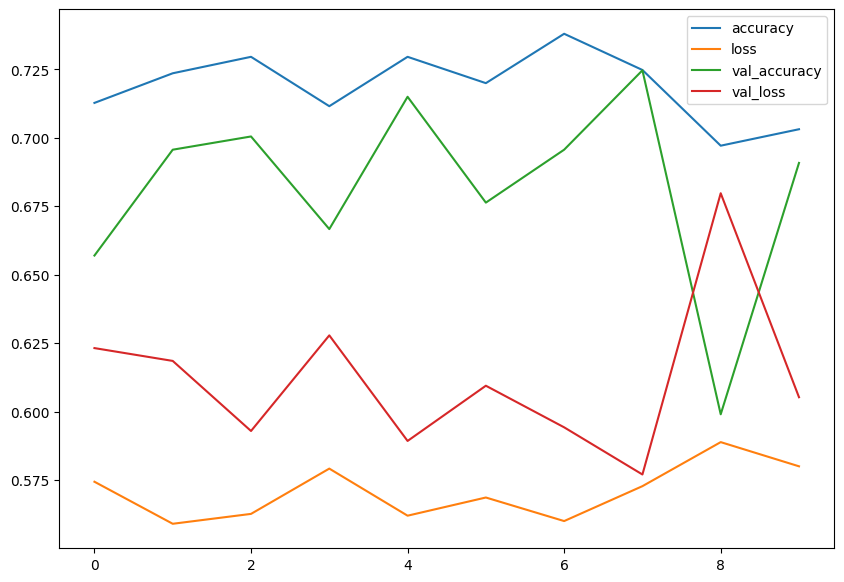

In [78]:
import pandas as pd
pd.DataFrame(history_17.history).plot(figsize=(10,7))

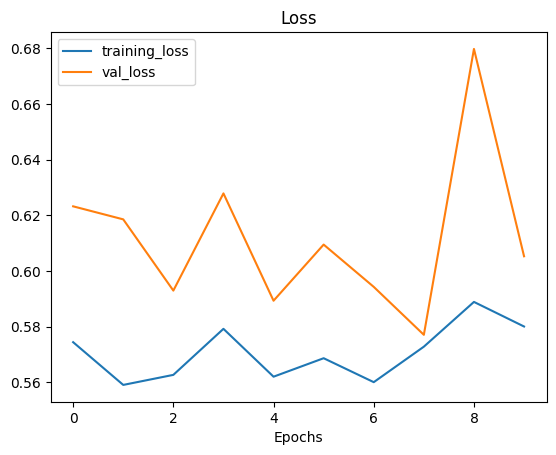

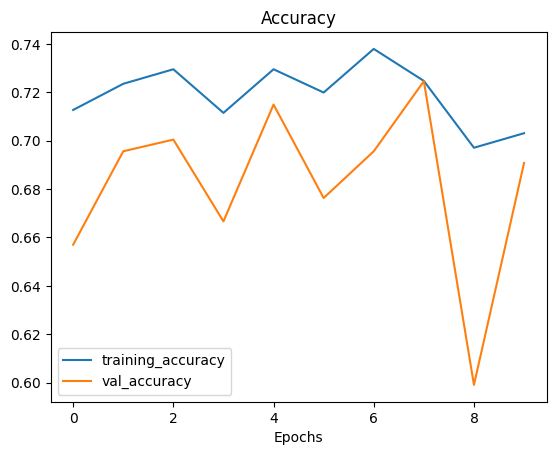

In [79]:
plot_loss_curves(history_17)

In [80]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_18 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_18.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=["accuracy"])

history_18 = model_18.fit(train_data_2,
          epochs=20,
          validation_data=val_data_2,
          callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 569ms/step - accuracy: 0.4928 - loss: 0.6958 - val_accuracy: 0.5990 - val_loss: 0.6805
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 495ms/step - accuracy: 0.6128 - loss: 0.6787 - val_accuracy: 0.5990 - val_loss: 0.6779
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 499ms/step - accuracy: 0.5959 - loss: 0.6801 - val_accuracy: 0.5990 - val_loss: 0.6772
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 507ms/step - accuracy: 0.5861 - loss: 0.6833 - val_accuracy: 0.5990 - val_loss: 0.6764
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 495ms/step - accuracy: 0.5715 - loss: 0.6814 - val_accuracy: 0.5990 - val_loss: 0.6764
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 492ms/step - accuracy: 0.5992 - loss: 0.6807 - val_accuracy: 0.5990 - val_loss: 0.6753
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 497ms/step - accuracy: 0.5824 - loss: 0.6846 - val_accuracy: 0.5990 - val_loss: 0.6752
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 496ms/step - accuracy: 0.5953 - loss: 0.6783 - val_accu

In [81]:
## 과적합을 방지할 요량으로 위와 같이 만들었으나 모델의 성능이 떨어져서 사용하지 못 할 것으로 보인다.

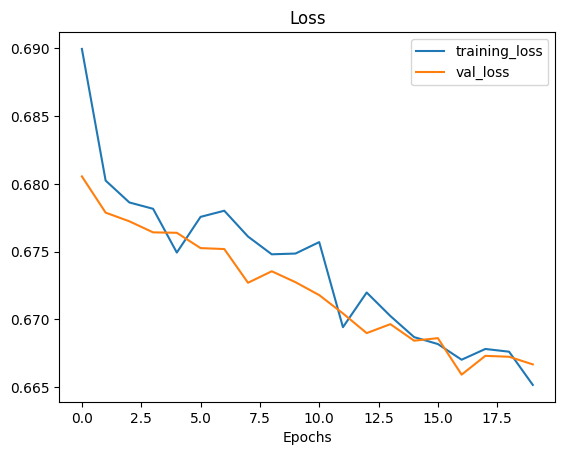

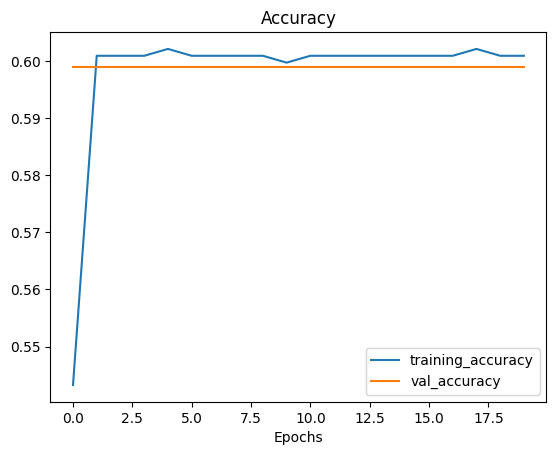

In [82]:
plot_loss_curves(history_18)